<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Moodle/blob/master/ActividadesMoodle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plot
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
actividad = pd.read_excel('/content/actividad.xlsx')

In [0]:
actividad.head()

,ACTIVIDADES,ALGEBRA LINEAL,AUDITORÍA OPERATIVA,CÁLCULO DSR,INTRODUCCIÓN A LA ECONOMÍA II,ELEMENTOS DE ADMINISTRACIÓN,DERECHO PRIVADO,DERECHO LABORAL Y ADMINISTRACIÓN DE PERSONAL,AUDITORÍA OPERATIVA Y DE SISTENAS COMPUTARIZADOS,ESTADÍSTICA I,INTRODUCCIÓN AL ÁLGEBRA,INGLÉS TÉCNICO I 2DO AÑO,FINANZAS PÚBLICAS,CONTABILIDAD SUPERIOR,DERECHO SUCESORIO,DERECHO PREIVADO II,DERECHO PRIVADO III,DERECHO CONCURSAL,MATEMÁTICAS II,DERECHO PRIVADO I,CONTABILIDAD I DSR -DSM,ESTADOS CONTABLES DSM,ADMINISTRACIÓN I DSR,MATEMÁTICA I DSR,FUNDAMENTOS DE CONTABILIDAD,INTRODUCCIÓN A LA ECONOMÍA DSR,TECNOLOGÍAS DE LA INFORMACIÓN DSR,METODOLOGÍA DE TRABAJO DE INVESTIGACION,CONTABILIDAD DE COSTOS,TEORÍA Y TÉCNICA IMPOSITIVA,TEORÍA Y TÉCNICA IMPOSITIVA II,ADMINISTRACIÓN FINANCIERA,AUDITORÁ,ADMINISTRACIÓN FINANCIERA.1,ACTUACIÓN PROFESIONAL,CONTROL DE GESTIÓN,INTRODUCCIÓN AL DERECHO PRIVADO LA,COSTOS PARA LAS DECISIONES,COMERCIALIZACIÓN I LA DSR,MATEMÁTICA Y CÁLCULO FINANCIERO,ADMINISTRACIÓN DE OPERACIONES II LA,MACROECONOMÍA LA,ANÁLISIS ORGANIZACIONAL LA,ESTRATÉGIA DE NEGOCIO LA,INVESTIGACIÓN DE MERCADO LA,NEGOCIACIÓN LA,CÁLCULO II LA,EMPRESAS FAMILIARES LA,ADMINISTRACIÓN DE ENTIDADES,INVESTIGACIÓN OPERATIVA LA,ADMINISTRACIÓN Y CONTABILIDAD EN LA HACIENDA PÚBLICA,CANTIDAD DE CURSOS PLA 1998
0,BASE DE DATOS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,BigBlueButtonBN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CERTIFICADO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3
3,CHAT,0,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,24
4,CONSULTA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,7


In [0]:
actividad.describe()

,ALGEBRA LINEAL,AUDITORÍA OPERATIVA,CÁLCULO DSR,INTRODUCCIÓN A LA ECONOMÍA II,ELEMENTOS DE ADMINISTRACIÓN,DERECHO PRIVADO,DERECHO LABORAL Y ADMINISTRACIÓN DE PERSONAL,AUDITORÍA OPERATIVA Y DE SISTENAS COMPUTARIZADOS,ESTADÍSTICA I,INTRODUCCIÓN AL ÁLGEBRA,INGLÉS TÉCNICO I 2DO AÑO,FINANZAS PÚBLICAS,CONTABILIDAD SUPERIOR,DERECHO SUCESORIO,DERECHO PREIVADO II,DERECHO PRIVADO III,DERECHO CONCURSAL,MATEMÁTICAS II,DERECHO PRIVADO I,CONTABILIDAD I DSR -DSM,ESTADOS CONTABLES DSM,ADMINISTRACIÓN I DSR,MATEMÁTICA I DSR,FUNDAMENTOS DE CONTABILIDAD,INTRODUCCIÓN A LA ECONOMÍA DSR,TECNOLOGÍAS DE LA INFORMACIÓN DSR,METODOLOGÍA DE TRABAJO DE INVESTIGACION,CONTABILIDAD DE COSTOS,TEORÍA Y TÉCNICA IMPOSITIVA,TEORÍA Y TÉCNICA IMPOSITIVA II,ADMINISTRACIÓN FINANCIERA,AUDITORÁ,ADMINISTRACIÓN FINANCIERA.1,ACTUACIÓN PROFESIONAL,CONTROL DE GESTIÓN,INTRODUCCIÓN AL DERECHO PRIVADO LA,COSTOS PARA LAS DECISIONES,COMERCIALIZACIÓN I LA DSR,MATEMÁTICA Y CÁLCULO FINANCIERO,ADMINISTRACIÓN DE OPERACIONES II LA,MACROECONOMÍA LA,ANÁLISIS ORGANIZACIONAL LA,ESTRATÉGIA DE NEGOCIO LA,INVESTIGACIÓN DE MERCADO LA,NEGOCIACIÓN LA,CÁLCULO II LA,EMPRESAS FAMILIARES LA,ADMINISTRACIÓN DE ENTIDADES,INVESTIGACIÓN OPERATIVA LA,ADMINISTRACIÓN Y CONTABILIDAD EN LA HACIENDA PÚBLICA,CANTIDAD DE CURSOS PLA 1998
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.214286,0.428571,0.214286,0.142857,0.285714,0.142857,0.071429,0.357143,0.071429,0.142857,0.142857,0.285714,0.214286,0.071429,0.071429,0.357143,0.071429,0.214286,0.285714,0.142857,0.071429,0.142857,0.071429,0.285714,0.071429,0.0,0.428571,0.071429,0.142857,0.0,0.214286,0.071429,0.071429,0.214286,0.285714,0.142857,0.071429,0.285714,0.214286,0.142857,0.285714,0.142857,0.142857,0.071429,0.142857,0.142857,0.142857,0.214286,0.071429,0.142857,8.428571
std,0.425815,0.513553,0.425815,0.363137,0.468807,0.363137,0.267261,0.497245,0.267261,0.363137,0.363137,0.468807,0.425815,0.267261,0.267261,0.497245,0.267261,0.425815,0.468807,0.363137,0.267261,0.363137,0.267261,0.468807,0.267261,0.0,0.513553,0.267261,0.363137,0.0,0.425815,0.267261,0.267261,0.425815,0.468807,0.363137,0.267261,0.468807,0.425815,0.363137,0.468807,0.363137,0.363137,0.267261,0.363137,0.363137,0.363137,0.425815,0.267261,0.363137,9.621405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

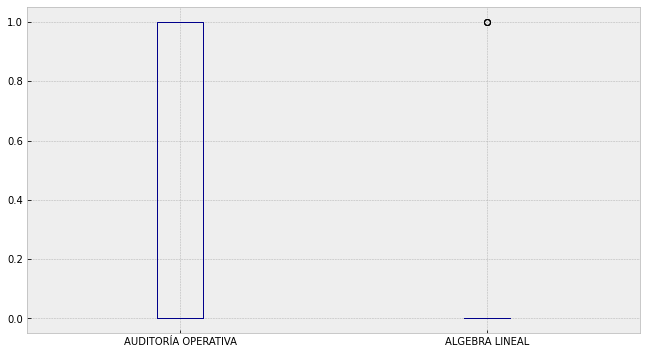

In [0]:
plot.style.use('bmh')
actividad.plot('ACTIVIDADES',['AUDITORÍA OPERATIVA', 'ALGEBRA LINEAL'], kind='box', figsize=(11,6), color='darkblue')

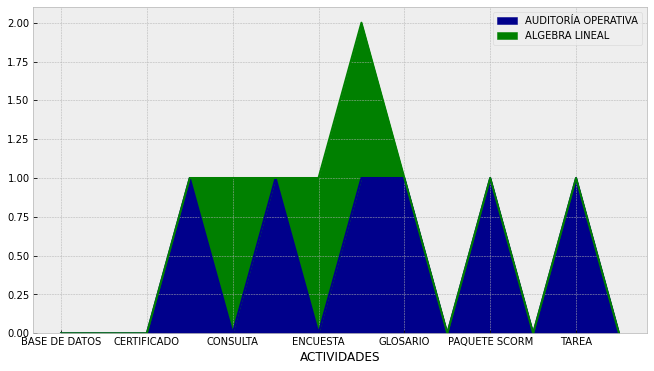

In [0]:
plot.style.use('bmh')
actividad.plot('ACTIVIDADES',['AUDITORÍA OPERATIVA', 'ALGEBRA LINEAL'], kind='area', figsize=(11,6), color=['darkblue','green'])

In [0]:
import seaborn as sns
from fbprophet import Prophet
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
participacionusuario = pd.read_excel('/content/ingresosestudiantes.xlsx')

In [0]:
participacionusuario.head()

,FECHA,INGRESOS
0,2017-01-01,7402
1,2017-01-02,6799
2,2017-01-03,6168
3,2017-01-04,5803
4,2017-01-05,5548


In [0]:
participacionusuario['INCREMENTO'] = participacionusuario.INGRESOS.pct_change()

In [0]:
participacionusuario.head()

,FECHA,INGRESOS,INCREMENTO
0,2017-01-01,7402,NaN
1,2017-01-02,6799,-0.081464
2,2017-01-03,6168,-0.092808
3,2017-01-04,5803,-0.059176
4,2017-01-05,5548,-0.043943


In [0]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import datetime as dt
import scipy.stats as scs
import numpy as np

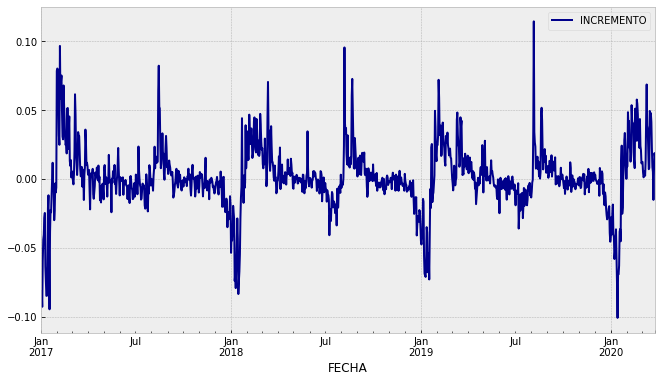

In [0]:
plot.style.use('bmh')
participacionusuario.plot('FECHA',['INCREMENTO'], kind='line', figsize=(11,6), color=['darkblue'])

### Serie de Tiempo

In [0]:
print(participacionusuario)

          FECHA  INGRESOS  INCREMENTO
0    2017-01-01      7402         NaN
1    2017-01-02      6799   -0.081464
2    2017-01-03      6168   -0.092808
3    2017-01-04      5803   -0.059176
4    2017-01-05      5548   -0.043943
...         ...       ...         ...
1176 2020-03-22     15861    0.005006
1177 2020-03-23     15619   -0.015258
1178 2020-03-24     15712    0.005954
1179 2020-03-25     16005    0.018648
1180 2020-03-26     16258    0.015808

[1181 rows x 3 columns]


[Text(0, 0.5, 'Incrementos en ingresos')]

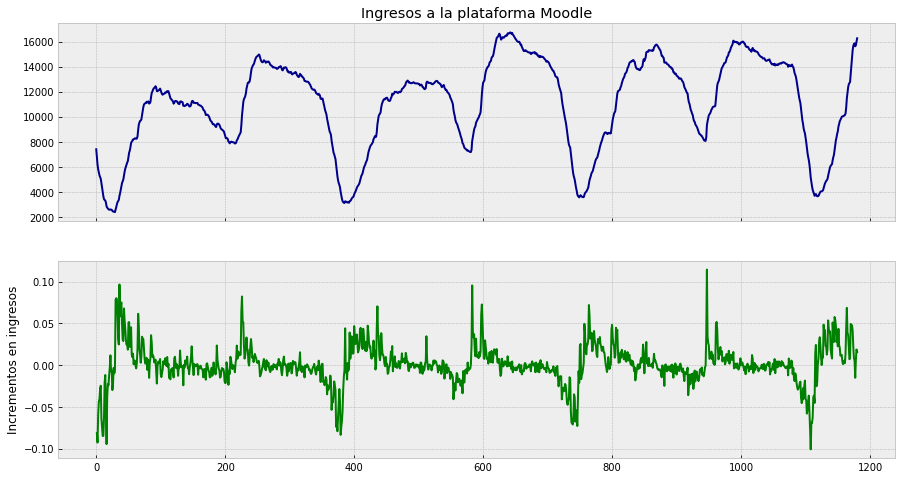

In [0]:
plot.style.use('bmh')
fig, ax = plot.subplots(2, 1, figsize=(15,8), sharex=True)

participacionusuario.INGRESOS.plot(ax=ax[0], color=['darkblue'])
ax[0].set(title = 'Ingresos a la plataforma Moodle')
    
participacionusuario.INCREMENTO.plot(ax=ax[1], color=['green'])
ax[1].set(ylabel = 'Incrementos en ingresos')

## **Datos atípicos**

In [0]:
df_rolling = participacionusuario[['INGRESOS']].rolling(window=21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [0]:
df_outliers = participacionusuario.join(df_rolling)

In [0]:
def indentify_outliers(row, n_sigmas=3):
    x = row['INGRESOS']
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0

In [0]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, axis=1)                                                                                                       
outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['INGRESOS']]

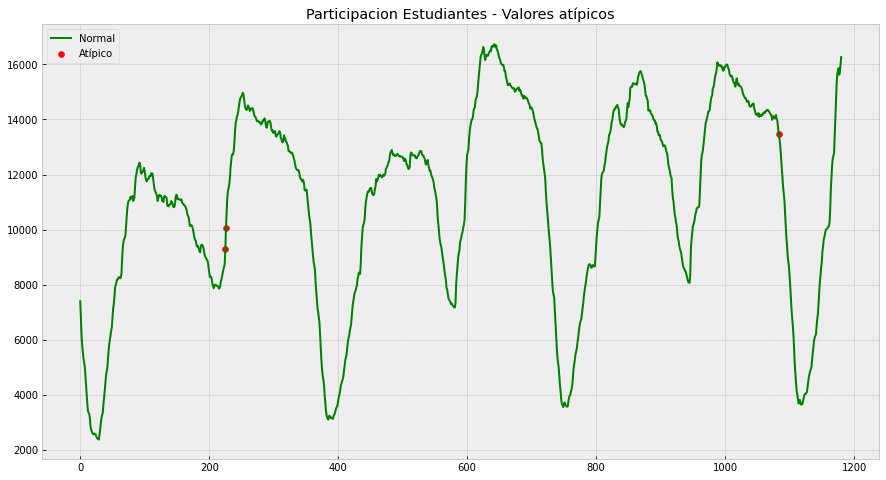

In [0]:
plot.style.use('bmh')
fig, ax = plot.subplots(figsize=(15,8))

ax.plot(df_outliers.index, df_outliers.INGRESOS, color='green', label='Normal')
ax.scatter(outliers.index, outliers.INGRESOS, color='red', label='Atípico')
ax.set_title("Participacion Estudiantes - Valores atípicos")
ax.legend(loc='upper left')

### Estadistica descriptiva


In [0]:
rango = participacionusuario.INGRESOS.max() - participacionusuario.INGRESOS.min()
media = participacionusuario.INGRESOS.mean()
desviacion = participacionusuario.INGRESOS.std()

In [0]:
norm_pdf = scs.norm.pdf(rango, loc=media, scale=desviacion) 

Text(0.5, 1.0, 'Q-Q plot Ingresos')

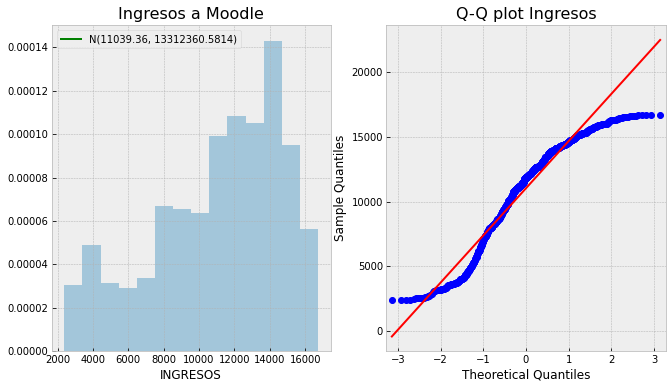

In [0]:
plot.style.use('bmh')
fig, ax = plot.subplots(1, 2, figsize=(11, 6))

# Histograma
sns.distplot(participacionusuario.INGRESOS, kde=False, norm_hist=True, ax=ax[0]) 
ax[0].set_title('Ingresos a Moodle', fontsize=16) 
ax[0].plot(rango, norm_pdf, 'g', lw=2, label=f'N({media:.2f}, {desviacion**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(participacionusuario.INGRESOS.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot Ingresos', fontsize = 16)

In [0]:
import statsmodels.tsa.api as smt

In [0]:
N_LAGS = 50
Nivel = 0.05

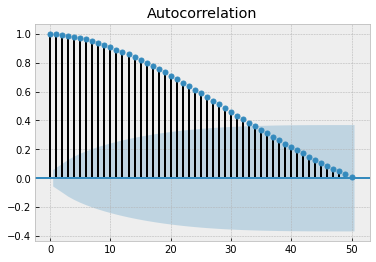

In [0]:
acf = smt.graphics.plot_acf(participacionusuario.INGRESOS, lags=N_LAGS, alpha=Nivel)

### Serie de Tiempo

In [0]:
import seaborn as sns
from fbprophet import Prophet
import pandas.util.testing as tm

In [0]:
participacionusuario.rename(columns={'FECHA': 'ds', 'INGRESOS': 'y'}, inplace=True)

In [0]:
participacionusuario = participacionusuario.drop(columns=['INCREMENTO'])

In [0]:
print(participacionusuario)

             ds      y
0    2017-01-01   7402
1    2017-01-02   6799
2    2017-01-03   6168
3    2017-01-04   5803
4    2017-01-05   5548
...         ...    ...
1176 2020-03-22  15861
1177 2020-03-23  15619
1178 2020-03-24  15712
1179 2020-03-25  16005
1180 2020-03-26  16258

[1181 rows x 2 columns]


In [0]:
train_indices = participacionusuario.ds.apply(lambda x: x.year) < 2021
df_train = participacionusuario.loc[train_indices].dropna()
df_test = participacionusuario.loc[~train_indices].reset_index(drop=True)

In [0]:
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_prophet.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


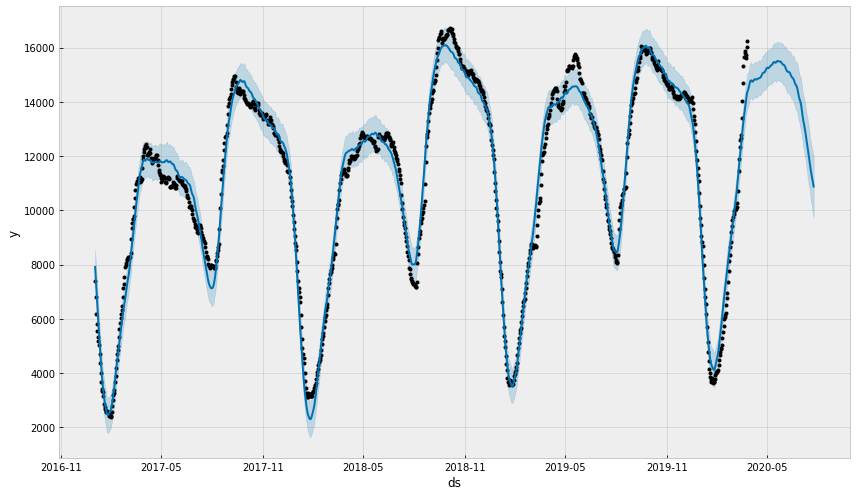

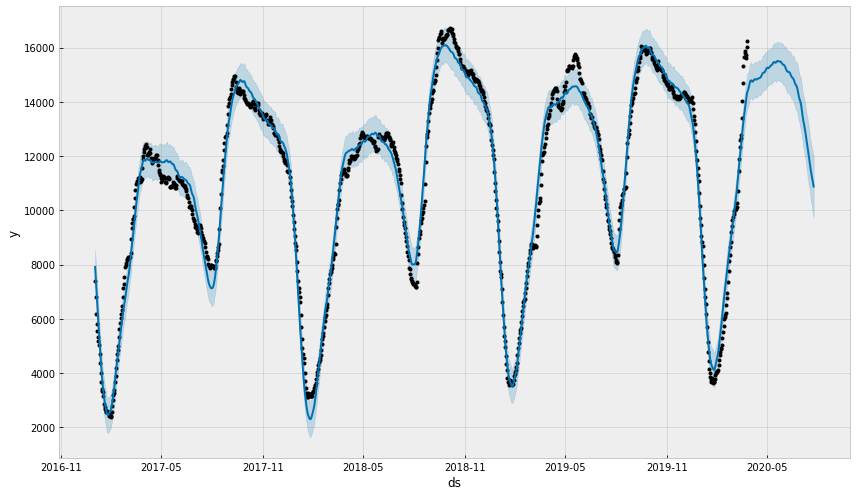

In [0]:
df_future = model_prophet.make_future_dataframe(periods=120)
df_pred = model_prophet.predict(df_future)
model_prophet.plot(df_pred, figsize=(12, 7))